In [1]:
!pip install huggingface_hub
!pip install wordcloud

In [7]:
!pip install datasets

In [3]:
#导入工具
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kaijimima1234/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaijimima1234/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#!huggingface-cli login  


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 

In [5]:
from huggingface_hub import whoami
whoami()

{'type': 'user',
 'id': '685d0c0c66fca32c0a4d417c',
 'name': 'YikFai',
 'fullname': 'YIHUI SUN',
 'canPay': False,
 'periodEnd': None,
 'isPro': False,
 'avatarUrl': 'https://cdn-avatars.huggingface.co/v1/production/uploads/noauth/JMDEQO1_Of4aoeExP41tX.jpeg',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'sunyihui_token',
   'role': 'fineGrained',
   'createdAt': '2025-06-26T09:08:06.051Z',
   'fineGrained': {'canReadGatedRepos': True,
    'global': ['discussion.write', 'post.write'],
    'scoped': [{'entity': {'_id': '685d0c0c66fca32c0a4d417c',
       'type': 'user',
       'name': 'YikFai'},
      'permissions': ['repo.content.read',
       'repo.write',
       'inference.serverless.write',
       'inference.endpoints.infer.write',
       'inference.endpoints.write',
       'user.webhooks.read',
       'user.webhooks.write',
       'collection.read',
       'collection.write',
       'discussion.write',
       'user.billing.read']}]}}}}

In [15]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [39]:
import notebook  
print(notebook.__version__)

7.2.2


In [1]:
from datasets import load_dataset

# 使用 streaming 加载，不会启用 widget
dataset_stream = load_dataset("momo1942/x_dataset_10290", split='train', streaming=True)

# 转换成前 N 条构成的新列表
n = 10000  # 设置你想要的数量，比如 10000
subset = []
for i, item in enumerate(dataset_stream):
    if i >= n:
        break
    subset.append(item)

print(f"成功加载 {len(subset)} 条推文")
print(subset[:10])

Resolving data files:   0%|          | 0/414 [00:00<?, ?it/s]

成功加载 10000 条推文
[{'text': '#001x456 #inhun #SquidGame2 \ntwo frontmen au', 'label': '#001x456', 'tweet_hashtags': ['#001x456', '#inhun', '#SquidGame2'], 'datetime': '2025-01-23', 'username_encoded': 'Z0FBQUFBQm5tUTJOUG1JOUphTWlscU1lc2swSnhsUW84Uk03cFhRaU9zUHpzbGhnT0VaYlY1UmwzWWVIdy0yajhhODRzU2xxZTFCZEJSbk9rTDZPOV9pclViQnFlSUxtTXc9PQ==', 'url_encoded': 'Z0FBQUFBQm5tUTJTdjZuRUNPUWtwSVJuMDY0Uzl5NlpNdENWN2xTV2Z4NkdDYURrM01jNDA4Nm1laGY4OXZOQS1TQk1UQ2psc3YxTE5YWnAwdEV1c2o5SzRKQW5nQ0hvRlIyQVQ0R2phV2JpX2N5T2Y4ZzVqLVVidWR3V1BaRkVXcmJCY01qNThuWVR1d2FxODBhaGJQUzJWT3BnZ25BMkVRPT0='}, {'text': '#001x456  #inhun   #イノギフ', 'label': '#001x456', 'tweet_hashtags': ['#001x456', '#inhun', '#イノギフ'], 'datetime': '2025-01-23', 'username_encoded': 'Z0FBQUFBQm5tUTJOS1dNT2M0eFFGWG1oNlB5NG0yNlpfREpJV1dPRWtoTlFEcFlqUmE0cy1oampZdFdZcTdsV3p3bVVwQ3hBUjdDVDdRZHU3NlFpellYbDFXZG1KekxpUHc9PQ==', 'url_encoded': 'Z0FBQUFBQm5tUTJTc2tHNWVteXJWRFR0RlZhZEJhZ1Y4SlRybVNIa3NIdk1udzlKU045aHF4ZzN0VDdnVnNIX0l5cFRXNlZaa2M1alpKQkpBZmJ

In [3]:
import re
import html

def clean_tweet(text):
    # 解码 HTML 字符（&amp; → &）
    text = html.unescape(text)
    
    # 全部转小写
    text = text.lower()

    # 去掉 URL
    text = re.sub(r'http\S+|www\S+', '', text)

    # 去掉 mention 和 hashtag（可选保留）
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # 替换常见缩写
    replacements = {
        "can't": "can not", "won't": "will not", "i'm": "i am",
        "it's": "it is", "you're": "you are", "they're": "they are",
        "n't": " not", "'re": " are", "'s": " is", "'d": " would",
        "'ll": " will", "'t": " not", "'ve": " have", "'m": " am"
    }
    for k, v in replacements.items():
        text = text.replace(k, v)

    # 只保留英文字母和空格
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 去掉多余空格
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [5]:
# 假设 subset 是你加载的列表（含 text 字段）
cleaned_texts = [clean_tweet(item["text"]) for item in subset]

# 示例查看前几条
for i in range(10):
    print(cleaned_texts[i])

two frontmen au

his calm demeanour sharp golden gaze while surrounded by white swans flowers happiest birthday to the most ethreal man ever


do not miss is investment opportunity learn how they are revolutionizing blockchain security in the quantum age
el personal tcnico y auxiliar de la del avanza en los preparativos del del con la socializacin del contenido de la ecae a cargo del mtro toms othon barahona en la
c fall winter collection fashion show at paris men fashion week fw january

q


In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaijimima1234/nltk_data...


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [11]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:

# 下载词典并初始化分析器
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaijimima1234/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# 模拟 subset（实际使用时替换为你的实际数据）
subset = [
    {"text": "Ethereum is soaring! Great investment today!"},
    {"text": "Not sure how I feel about ETH lately..."},
    {"text": "ETH is crashing badly. Worst decision ever."}
]

In [17]:
# 清洗函数
def remove_non_ascii(text):
    return ''.join(c for c in text if 0 < ord(c) < 127)

def clean_tweet(text):
    text = remove_non_ascii(text)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

In [19]:
# 情绪分析 + 保存结果
results = []
for item in subset:
    raw_text = item["text"]
    cleaned = clean_tweet(raw_text)
    score = sia.polarity_scores(cleaned)
    compound = score['compound']
    if compound >= 0.05:
        sentiment = 'positive'
    elif compound <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    results.append({
        "original": raw_text,
        "cleaned": cleaned,
        "compound": compound,
        "sentiment": sentiment  
    })


In [21]:
# 保存 CSV
df = pd.DataFrame(results)
df.to_csv("eth_sentiment_results.csv", index=False)
print("✅ 情绪分析完成，结果已保存为 eth_sentiment_results.csv")

✅ 情绪分析完成，结果已保存为 eth_sentiment_results.csv


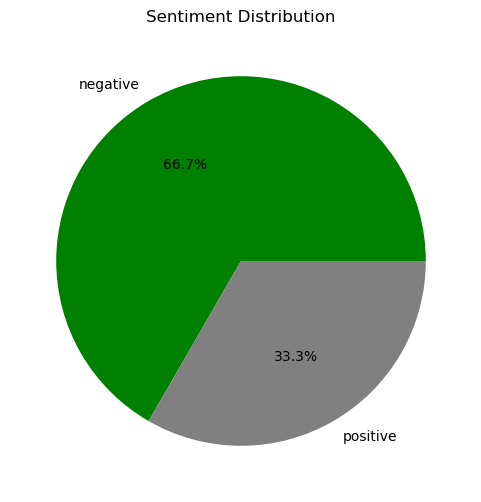

In [23]:
# 可视化 - 情绪饼图
sentiment_counts = df['sentiment'].value_counts()
colors = ['green', 'gray', 'red']
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Sentiment Distribution")
plt.show()

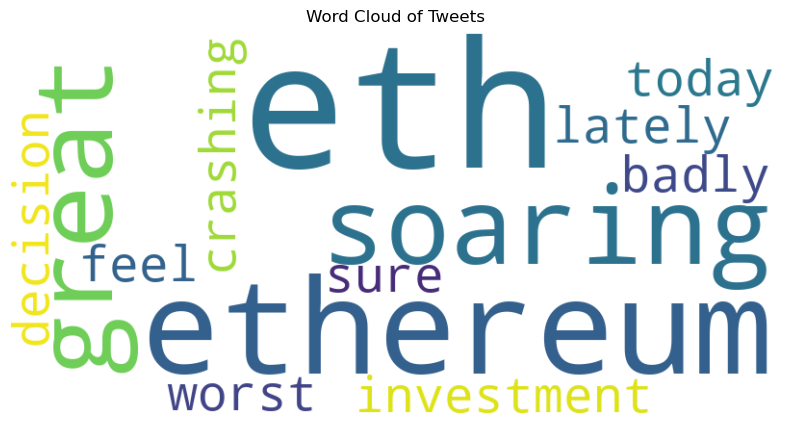

In [25]:

# 可视化 - 词云
all_text = ' '.join(df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()